In [1]:
import os
import sys

# allow importing from parent directory
current_folder = globals()['_dh'][0]
data_location = os.path.join(current_folder,'data.csv')
sys.path.append(os.path.abspath(os.path.join(os.path.dirname(data_location), '..')))

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from IPython.display import display

from ultralytics import settings
settings.update({"sync": False, "runs_dir": "interim_results", "datasets_dir": "datasets"})
from ultralytics import YOLOEdgeUncertainty, YOLO
import cv2
import re
import datetime

FONT_SMALL = 16
FONT_MEDIUM = 18
FONT_LARGE = 20

plt.rcParams['font.size'] = FONT_LARGE
plt.rcParams['axes.labelsize'] = FONT_MEDIUM
plt.rcParams['xtick.labelsize'] = FONT_SMALL
plt.rcParams['ytick.labelsize'] = FONT_SMALL
plt.rcParams['legend.fontsize'] = FONT_SMALL
plt.rcParams['figure.titlesize'] = FONT_MEDIUM
plt.rcParams['axes.titlesize'] = FONT_MEDIUM
plt.rcParams['figure.figsize'] = (15, 7)

In [2]:
path_base = '../interim_results/detect'

all_folders = [f for f in os.listdir(path_base) if re.match(r'\d{4}-\d{2}-\d{2}_\d{2}-\d{2}-\d{2}', f)]
newest_results = sorted(all_folders)[-1]
print(f'Newest results folder: {newest_results}')

print(f'Newest results: {newest_results}')  
train_path = f'{path_base}/{newest_results}/train'

df_results_train = pd.DataFrame()
for model_folder in [f for f in os.listdir(train_path) if os.path.isdir(f'{train_path}/{f}')]:
    df_results_model = pd.read_csv(f'{train_path}/{model_folder}/results.csv')
    if df_results_train.empty:
        df_results_train = df_results_model
    else:
        df_results_train = pd.concat([df_results_train, df_results_model])

df_results_val = pd.DataFrame()
val_path = f'{path_base}/{newest_results}/val'
for model_folder in [f for f in os.listdir(val_path) if os.path.isdir(f'{val_path}/{f}')]:
    df_results_model = pd.read_csv(f'{val_path}/{model_folder}/results.csv')
    if df_results_val.empty:
        df_results_val = df_results_model
    else:
        df_results_val = pd.concat([df_results_val, df_results_model])

df_results_train.set_index('name', inplace=True)
df_results_train = df_results_train.sort_index()
df_results_val.set_index('name', inplace=True)
df_results_val = df_results_val.sort_index()

# minmax scaling of all speed cols
speed_cols = [col for col in df_results_train.columns if 'speed' in col]
df_results_train['speed_total'] = df_results_train[speed_cols].sum(axis=1)
df_results_val['speed_total'] = df_results_val[speed_cols].sum(axis=1)

display(df_results_train)
display(df_results_val)

Newest results folder: 2025-07-04_14-53-58_models-5_epochs-50
Newest results: 2025-07-04_14-53-58_models-5_epochs-50


,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),metrics/mUE50,metrics/mUE50_thres,metrics/mUE50-95,metrics/mUE50-95_thres,metrics/mUE50_correct,metrics/mUE50_incorrect,metrics/mUE50-95_correct,metrics/mUE50-95_incorrect,fitness,speed_preprocess,speed_inference,speed_loss,speed_postprocess,speed_total
name,,,,,,,,,,,,,,,,,,
base-confidence,0.472246,0.264459,0.266404,0.149966,0.200258,0.8,0.122213,0.70,0.140260,0.059998,0.077525,0.044688,0.161610,0.013274,0.154954,0.000163,2.411853,2.580244
base-uncertainty,0.472246,0.264459,0.266404,0.149966,0.578546,0.1,0.536951,0.51,0.461268,0.117278,0.270628,0.266324,0.161610,0.013986,0.160046,0.000170,2.488438,2.662639
edl-meh,0.378550,0.269478,0.236446,0.128834,0.432571,0.1,0.323651,0.10,0.286555,0.146015,0.177743,0.145908,0.139596,0.013328,0.393401,0.000184,2.596561,3.003473
ensemble,0.476994,0.275042,0.281177,0.155412,0.340956,0.1,0.264244,0.10,0.180248,0.160708,0.106144,0.158100,0.167988,0.013245,2.315220,0.000216,0.686861,3.015542
mc-dropout,0.463633,0.274771,0.267934,0.151122,0.493568,0.3,0.492878,0.25,0.000000,0.493568,0.000059,0.492819,0.162803,0.013093,2.221753,0.000212,0.527140,2.762198


,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),metrics/mUE50,metrics/mUE50_thres,metrics/mUE50-95,metrics/mUE50-95_thres,metrics/mUE50_correct,metrics/mUE50_incorrect,metrics/mUE50-95_correct,metrics/mUE50-95_incorrect,fitness,speed_preprocess,speed_inference,speed_loss,speed_postprocess,speed_total
name,,,,,,,,,,,,,,,,,,
base-confidence,0.389937,0.224070,0.216216,0.124083,0.229796,0.9,0.142796,0.73,0.127356,0.102440,0.095133,0.047663,0.133297,0.020556,0.801486,0.000338,0.423347,1.245727
base-uncertainty,0.389937,0.224070,0.216216,0.124083,0.586773,1.0,0.554167,0.96,0.123517,0.463256,0.102756,0.451411,0.133297,0.019705,0.767059,0.000348,0.438817,1.225928
edl-meh,0.376564,0.209503,0.187276,0.104893,0.301391,0.2,0.200543,0.15,0.216099,0.085292,0.135164,0.065379,0.113132,0.016274,0.520087,0.000362,0.713946,1.250668
ensemble,0.400001,0.215732,0.209762,0.118854,0.503612,1.0,0.480561,0.74,0.005570,0.498042,0.049542,0.431019,0.127945,0.019991,0.946537,0.000348,0.427775,1.394651
mc-dropout,0.399324,0.220569,0.213166,0.121623,0.500000,0.4,0.499986,0.37,0.000000,0.500000,0.000000,0.499986,0.130778,0.019741,1.185249,0.000368,0.436657,1.642015


Text(0.5, 1.0, 'mean Average Precision (mAP): cityscapes (train), foggy-cityscapes (val)')

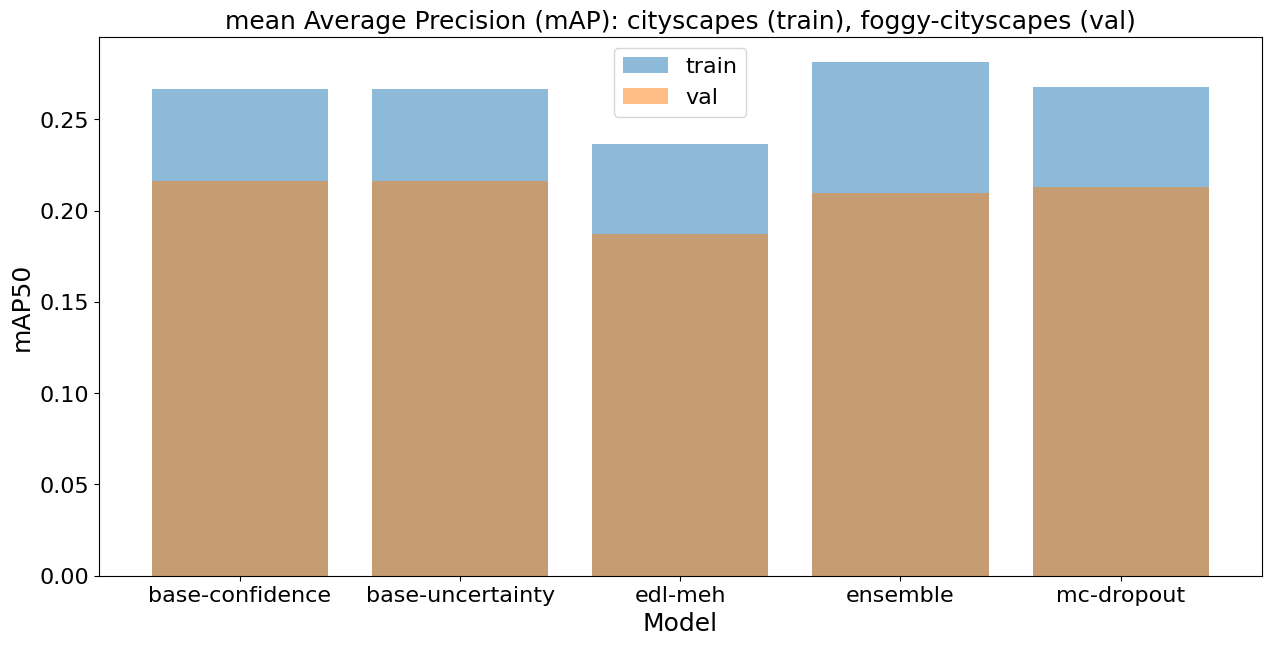

In [3]:
plt.bar(df_results_train.index, df_results_train['metrics/mAP50(B)'], alpha=0.5, label='train')
plt.bar(df_results_val.index, df_results_val['metrics/mAP50(B)'], alpha=0.5, label='val')

plt.xlabel('Model')
plt.ylabel('mAP50')
plt.legend()
plt.title('mean Average Precision (mAP): cityscapes (train), foggy-cityscapes (val)')

In [4]:
# mue values of most models (except base-confidence and edl-meh) too high, probablily implementation bug in calcuating uncertainty values
df_results_val[['metrics/mAP50(B)', 'metrics/mUE50', 'metrics/mUE50_correct', 'metrics/mUE50_incorrect']]

,metrics/mAP50(B),metrics/mUE50,metrics/mUE50_correct,metrics/mUE50_incorrect
name,,,,
base-confidence,0.216216,0.229796,0.127356,0.102440
base-uncertainty,0.216216,0.586773,0.123517,0.463256
edl-meh,0.187276,0.301391,0.216099,0.085292
ensemble,0.209762,0.503612,0.005570,0.498042
mc-dropout,0.213166,0.500000,0.000000,0.500000


In [5]:
# title case
names_title_case = df_results_train.index.str.replace('-', ' ').str.title().values
print(names_title_case)

['Base Confidence' 'Base Uncertainty' 'Edl Meh' 'Ensemble' 'Mc Dropout']


,Precision,Recall,mAP50,mAP50-95,FPS
name,,,,,
Base Confidence,1.000000,1.000000,1.000000,1.000000,1.000000
Base Uncertainty,1.000000,1.000000,1.000000,1.000000,0.969055
Edl Meh,0.801596,1.018979,0.887545,0.859091,0.859087
Ensemble,1.010055,1.040019,1.055452,1.036313,0.855649
Mc Dropout,0.981763,1.038993,1.005742,1.007708,0.934127


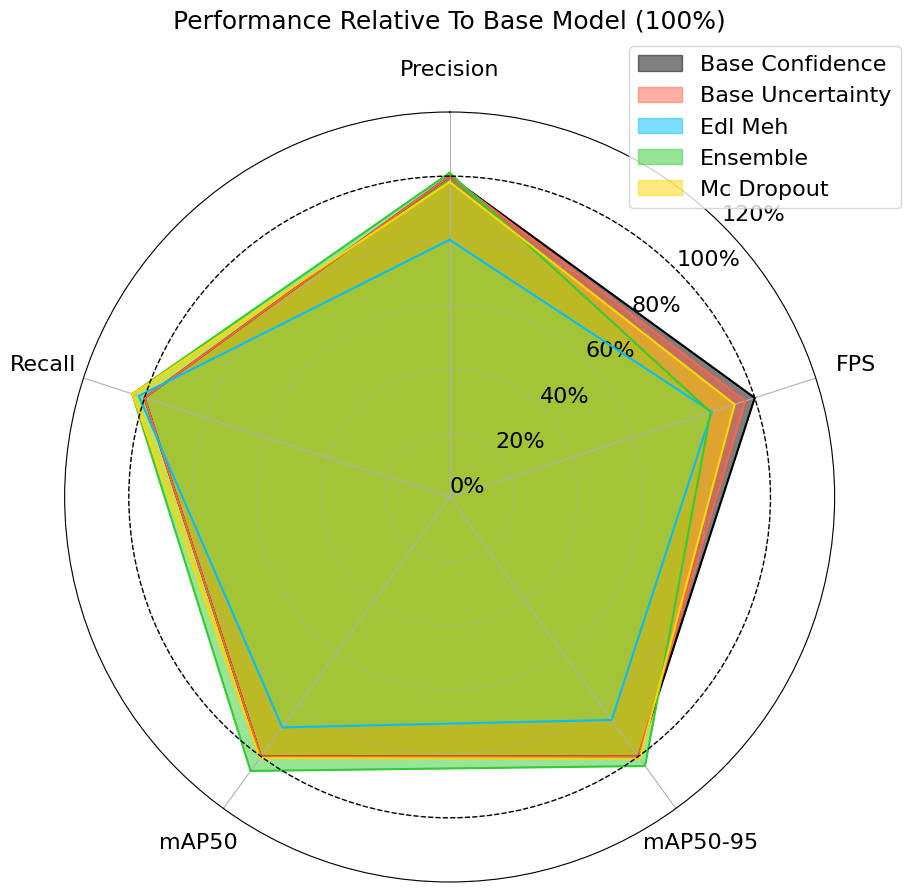

,Precision,Recall,mAP50,mAP50-95,FPS
name,,,,,
Base Confidence,1.000000,1.000000,1.000000,1.000000,1.000000
Base Uncertainty,1.000000,1.000000,1.000000,1.000000,1.016150
Edl Meh,0.965703,0.934987,0.866150,0.845346,0.996049
Ensemble,1.025808,0.962786,0.970150,0.957857,0.893218
Mc Dropout,1.024073,0.984375,0.985891,0.980175,0.758658


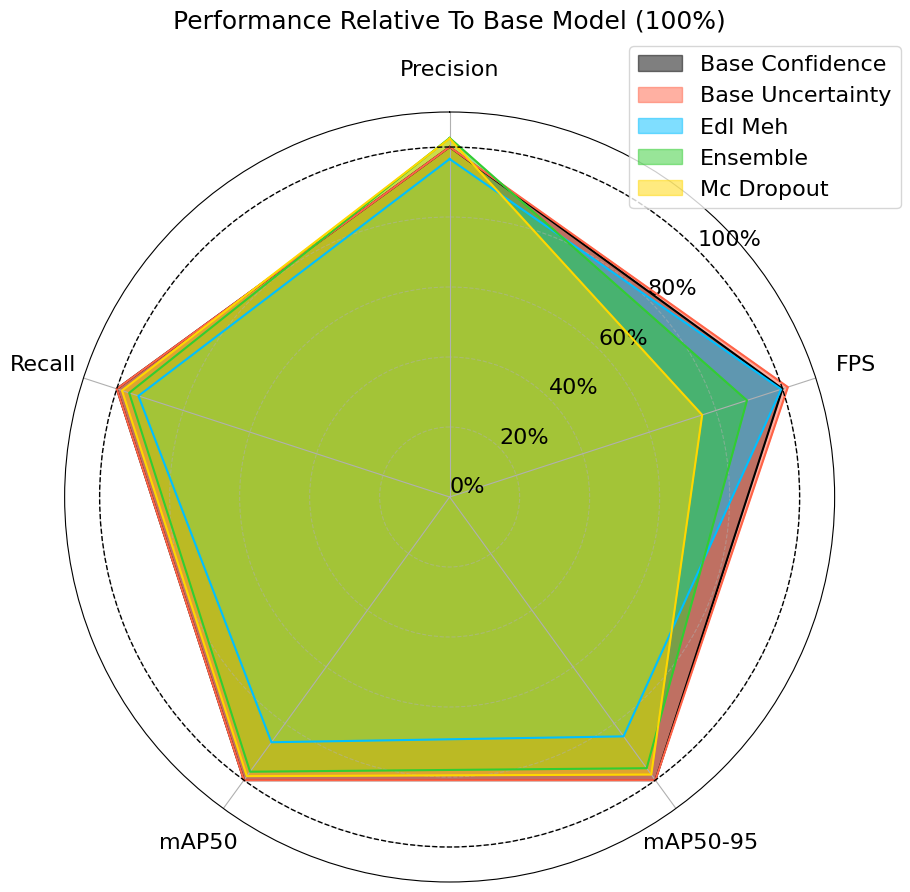

In [ ]:
rename_dict_index = {k: v for k, v in zip(df_results_train.index.values, names_title_case)}

rename_dict_cols = {
    'metrics/precision(B)' : 'Precision',
    'metrics/recall(B)' : 'Recall',
    'metrics/mAP50(B)' : 'mAP50',
    'metrics/mAP50-95(B)' : 'mAP50-95',
    'speed_total' : 'FPS',
    #'metrics/mUE50' : 'mUE50', # mUE implementation still work in progress, not yet ready for use
    #'metrics/mUE50-95' : 'mUE50-95',
}

color_list = ['k', 'tomato', 'deepskyblue', 'limegreen', 'gold', 'orchid', 'lightcoral', 'lightseagreen']
colors = {idx: color for idx, color in zip(names_title_case, color_list[:len(names_title_case)])}

for path, df_selected in zip([train_path, val_path], [df_results_train, df_results_val]):

    df = df_selected[rename_dict_cols.keys()]
    # take inverse of inference time as fps
    df.loc[:, 'speed_total'] = 1 / df['speed_total']
    # take base index, and normalize all values to it
    df = df / df.iloc[0]

    df.rename(index=rename_dict_index, inplace=True)
    df.rename(columns=rename_dict_cols, inplace=True)


    display(df)

    categories = list(df.columns)
    num_vars = len(categories)

    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Repeat the first angle to close the plot

    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

    for idx in df.index:
        values = df.loc[idx].tolist()
        values += values[:1]  # Repeat the first value to close the plot
        ax.fill(angles, values, alpha=0.50, color=colors[idx], label=idx)
        ax.plot(angles, values, color=colors[idx])

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)

    ylim = round(max(df.max()), 1) + 0.1
    ax.set_ylim(0, ylim)

    plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

    ax.tick_params(axis='x', pad=20)
    ax.set_yticks(np.arange(0, ylim, 0.2))
    ax.set_yticklabels(ax.get_yticks(), rotation=45)

    ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])
    ax.set_theta_offset(np.pi / 2)

    ax.yaxis.grid(True, linestyle='--', alpha=0.5)
    ax.axhline(1, color='black', linewidth=1, linestyle='--')
    ax.set_rlabel_position(-45)
    ax.set_title('Performance relative to base model (100%)'.title(), pad=60)
    ax.title.set_position([.5, 1.4])

    plt.savefig(f'{path}/radar_chart.png', bbox_inches='tight', dpi=600)
    plt.savefig(f'{path}/radar_chart.pdf', bbox_inches='tight')
    plt.show()